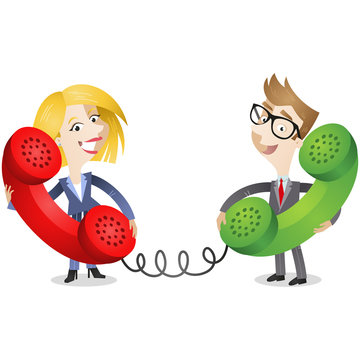

## Introduction

This project aims to develop a machine learning model for the Megaline company that can accurately predict an optimal new phone plan based on customer behavior. The model must maintain an accuracy of at least 0.75. This will be accomplished by:

1) splitting the given source data into train, validation, and test data
2) creating a model and tuning hyperparameters to maximize accuracy
3) predicting model accuracy using test data set
4) sanity checking our model to uncover potential errors
5) comparing results across different model types to see which one optimizes accuracy

This model will help Megaline users move out of their legacy plans and in turn increase customer experience and company revenue.


In [1]:
#load libraries
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
#load datasets
df = pd.read_csv('/datasets/users_behavior.csv')
display(df.head(10))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


*Data set has been previously processed so this does not need to be completed here*

## Split the source data into a training set, a validation set, and a test set

In [3]:
#define the features and target
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

#split the data set using the train_test_split method first time (test and train)
feature_train, feature_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=123)

#split training set second time (training and validation)
feature_val, feature_test, target_val, target_test = train_test_split(feature_temp, target_temp, test_size = 0.5, random_state = 123)

In [4]:
print(feature_val.shape)
print(feature_test.shape)
print(feature_train.shape)

(643, 4)
(643, 4)
(1928, 4)


Dataset sizes were chosen due to the fact that the test data set was not provided separately.

## *Model 1: RandomForestClassifier:* Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

In [5]:
#looking at optimal max_depth (writing our own functions to compare separate values will be referred to as hand chosen method)
for depth in range(1, 50):
        model = RandomForestClassifier(random_state = 123, max_depth=depth)
        model= model.fit(feature_train, target_train)
        predictions_val = model.predict(feature_val)

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_val, predictions_val))
print(model.get_params(deep=True))

max_depth = 1 : 0.7465007776049767
max_depth = 2 : 0.7869362363919129
max_depth = 3 : 0.7978227060653188
max_depth = 4 : 0.8087091757387247
max_depth = 5 : 0.8149300155520995
max_depth = 6 : 0.8180404354587869
max_depth = 7 : 0.8258164852255054
max_depth = 8 : 0.8304821150855366
max_depth = 9 : 0.8273716951788491
max_depth = 10 : 0.833592534992224
max_depth = 11 : 0.8273716951788491
max_depth = 12 : 0.8258164852255054
max_depth = 13 : 0.8180404354587869
max_depth = 14 : 0.8195956454121306
max_depth = 15 : 0.8211508553654744
max_depth = 16 : 0.8180404354587869
max_depth = 17 : 0.8149300155520995
max_depth = 18 : 0.8195956454121306
max_depth = 19 : 0.8227060653188181
max_depth = 20 : 0.8133748055987559
max_depth = 21 : 0.8133748055987559
max_depth = 22 : 0.8164852255054432
max_depth = 23 : 0.8195956454121306
max_depth = 24 : 0.8180404354587869
max_depth = 25 : 0.8180404354587869
max_depth = 26 : 0.8195956454121306
max_depth = 27 : 0.8149300155520995
max_depth = 28 : 0.8180404354587869
ma

In [6]:
#tune the number of trees to optimize accuracy (hand chosen method)
best_score = 0
best_est = 0
for est in range(1, 50):
    model = RandomForestClassifier(random_state=123, n_estimators=est)
    model.fit(feature_train, target_train)
    score = model.score(feature_val, target_val)
    if score > best_score:
        best_score = score
        best_est = est
print("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

Accuracy of the best model on the validation set (n_estimators = 38): 0.8289269051321928


RandomForestClassifier has been chosen as the model type for this project. This is because the target is either a 0 (SMART) or a 1 (ULTRA) making it a categorical target. Since our goal is to find the model with the highest possible *accuracy,* the RandomForestClassifier is the best choice.

Given this information, it seems that using a max_depth of 10 will yield the highest accuracy without having to continue adding depth. 

Looking at the hyperparameter for n_estimators, the best number of trees to use to optimize accuracy is 38 without having to add more trees that will impact the speed of model processing.

There are automated methods to find optimal hyperparameters in sklearn. I will be comparing those findings with my model parameters that I have found to see if one yields a model of higher accuracy

In [7]:
#confirming findings using GridSearchCV

model = RandomForestClassifier(random_state=123)

#hyperparameter grid
param_grid = {'n_estimators': [1, 100], 'max_depth': [1, 50, None]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(feature_train, target_train)

#use GridSearch to find optimal parameters
best_model = grid_search.best_estimator_
best_model.fit(feature_train, target_train)

#evaluate on the validation set
val_score = best_model.score(feature_val, target_val)
print(f'Validation set accuracy using GridSearchCV: {val_score}')


Validation set accuracy using GridSearchCV: 0.8180404354587869


In [8]:
#comparing acurracy scores for both tuning methods (hand chosen and gridsearchcv)
print(f'Validation set accuracy for GridSearchCV: {val_score}')
#setting model with parameters that were hand chosen
model = RandomForestClassifier(random_state = 123, n_estimators=38, max_depth=10)
final_model = model.fit(feature_train, target_train)
final_score = final_model.score(feature_val, target_val)
print(f'Validation set accuracy for hand chosen parameters: {final_score}')

Validation set accuracy for GridSearchCV: 0.8180404354587869
Validation set accuracy for hand chosen parameters: 0.833592534992224


Comparing the hyperparameter choosing methods, it would seem that overall the hand chosen parameters are slightly more accurate. While this difference might be negligible in different circumstances and different random states, given our goal for optimal accuracy we will use the hand chosen parameters for max_depth and n_estimators. 

## *Model 1: RandomForestClassifier:* Check the quality of the model using the test set

In [39]:
#making predictions on test data
test_predictions = final_model.predict(feature_test)

#find accuracy score
accuracy = accuracy_score(test_predictions, target_test)
print(f'Accuracy using test data set for RFC: {accuracy}')

Accuracy using test data set for RFC: 0.7978227060653188


The predictions made with test data yield an accuracy score higher that the threshold for this project, meaning that the quality is up to project standards.

## *Model 1: RandomForestClassifier:* Sanity check the model

In [38]:
#complete a confusion matrix to sanity check the model
conf_matrix = confusion_matrix(target_test, test_predictions)
print(conf_matrix)
accuracy_matrix = (411 + 102) / (411 + 35 + 95 + 102)
print(f'The accuracy according to the confusion matrix for RFC: {accuracy_matrix}')

[[411  35]
 [ 95 102]]
The accuracy according to the confusion matrix for RFC: 0.7978227060653188


In this confusion matrix, class 1 (ultra) is considered the positive class in this case while class 0 (smart) is considered the negative class. According to the matrix the ultra plan was correctly predicted 411 times and the smart plan was correctly predicted 102 times. However the model falsely predicted the ultra plan 35 times and falsely predicted the smart plan 95 times. This seems to show some sort of bias towards the smart plan, however the accuracy score was still above our target of 0.75, so the model is currently meeting project standards.

## *Model 2: DecisionTreeClassifier:* Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.

In [21]:
#looking at optimal max_depth for DTC(writing our own functions to compare separate values will be referred to as hand chosen method)
for depth in range(1, 50):
        model_dt = DecisionTreeClassifier(random_state = 123, max_depth=depth)
        model_dt= model_dt.fit(feature_train, target_train)
        predictions_val = model_dt.predict(feature_val)

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_val, predictions_val))
print(model_dt.get_params(deep=True))

max_depth = 1 : 0.7620528771384136
max_depth = 2 : 0.7900466562986003
max_depth = 3 : 0.80248833592535
max_depth = 4 : 0.8040435458786936
max_depth = 5 : 0.8227060653188181
max_depth = 6 : 0.8149300155520995
max_depth = 7 : 0.8118195956454122
max_depth = 8 : 0.80248833592535
max_depth = 9 : 0.8180404354587869
max_depth = 10 : 0.80248833592535
max_depth = 11 : 0.8149300155520995
max_depth = 12 : 0.8102643856920684
max_depth = 13 : 0.7884914463452566
max_depth = 14 : 0.7900466562986003
max_depth = 15 : 0.7713841368584758
max_depth = 16 : 0.7807153965785381
max_depth = 17 : 0.7698289269051322
max_depth = 18 : 0.7511664074650077
max_depth = 19 : 0.7573872472783826
max_depth = 20 : 0.7511664074650077
max_depth = 21 : 0.76049766718507
max_depth = 22 : 0.7589424572317263
max_depth = 23 : 0.749611197511664
max_depth = 24 : 0.7433903576982893
max_depth = 25 : 0.7402799377916018
max_depth = 26 : 0.744945567651633
max_depth = 27 : 0.744945567651633
max_depth = 28 : 0.7465007776049767
max_depth = 

DecisionTreeClassifier has been chosen as the model type for this project. This is because the target is either a 0 (SMART) or a 1 (ULTRA) making it a categorical target.

Given this information, it seems that using a max_depth of 5 will yield the highest accuracy without having to continue adding depth. 

There are automated methods to find optimal hyperparameters in sklearn. I will be comparing those findings with my model parameters that I have found to see if one yields a model of higher accuracy

In [12]:
#confirming findings using GridSearchCV for DTC

model_dt = DecisionTreeClassifier(random_state=123)

#hyperparameter grid
param_grid = {'max_depth': [1, 50, None]}
grid_search = GridSearchCV(model_dt, param_grid, cv=5)
grid_search.fit(feature_train, target_train)

#use GridSearch to find optimal parameters
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(feature_train, target_train)

#evaluate on the validation set
val_score_dt = best_model_dt.score(feature_val, target_val)
print(f'Validation set accuracy using GridSearchCV : {val_score_dt}')

Validation set accuracy using GridSearchCV : 0.7620528771384136


In [22]:
#comparing acurracy scores for both tuning methods (hand chosen and gridsearchcv) for DTC
print(f'Validation set accuracy for GridSearchCV: {val_score_dt}')
#setting model with parameters that were hand chosen
model_dt = DecisionTreeClassifier(random_state = 123, max_depth=5)
final_model_dt = model_dt.fit(feature_train, target_train)
final_score_dt = final_model_dt.score(feature_val, target_val)
print(f'Validation set accuracy for hand chosen parameters: {final_score_dt}')

Validation set accuracy for GridSearchCV: 0.7620528771384136
Validation set accuracy for hand chosen parameters: 0.8227060653188181


Comparing the hyperparameter choosing methods, it would seem that overall the hand chosen parameters are more accurate. While this difference might be negligible in different circumstances and different random states, given our goal for optimal accuracy we will use the hand chosen parameters for max_depth. 

## *Model 2: DecisionTreeClassifier:* Check the quality of the model using the test set

In [27]:
#making predictions on test data
test_predictions_dt = final_model_dt.predict(feature_test)

#find accuracy score
accuracy_dt = accuracy_score(test_predictions_dt, target_test)
print(f'Accuracy using test data set for DTC: {accuracy_dt}')

Accuracy using test data set for DTC: 0.7713841368584758


The predictions made with test data yield an accuracy score higher that the threshold for this project, meaning that the quality is up to project standards.

## *Model 2: DecisionTreeClassifier:* Sanity check the model

In [37]:
#complete a confusion matrix to sanity check the model
conf_matrix_dt = confusion_matrix(target_test, test_predictions_dt)
print(conf_matrix_dt)
accuracy_matrix_dt = (414 + 82) / (414 + 32 + 115 + 82)
print(f'The accuracy according to the confusion matrix for DTC: {accuracy_matrix_dt}')

[[414  32]
 [115  82]]
The accuracy according to the confusion matrix for DTC: 0.7713841368584758


## Conclusion

In [36]:
print(f'Accuracy using test data set for RFC: {accuracy:.4}')
print(f'Accuracy using test data set for DTC: {accuracy_dt:.4}')
print()
print(f'The accuracy according to the confusion matrix for RFC: {accuracy_matrix:.4}')
print(f'The accuracy according to the confusion matrix for DTC: {accuracy_matrix_dt:.4}')

Accuracy using test data set for RFC: 0.7978
Accuracy using test data set for DTC: 0.7714

The accuracy according to the confusion matrix for RFC: 0.7978
The accuracy according to the confusion matrix for DTC: 0.7714


Overall, both models are able to predict which plan, either smart or ultra, is optimal for over 75% of users given the current data. However the RandomForestClassifier model maintained slightly higher accuracy across both test data set use and confusion matrix use. Therefore I would suggest Megaline use this model to predict which plans users should switch to. A potential drawback of this model could be processing speed for larger datasets, but since accuracy is the goal in this study, I believe the lower processing speed is acceptable.

This model could further be improved by tuning other potentially impactful parameters or creating the model using a larger dataset. However this model meets projects standards and will help Megaline convert legacy plans users to upgraded plans.